# Figures for Chapter 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\Ricky Chen\AppData\Local\Temp\ipykernel_8972\2221561945.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  set2_colors = cm.get_cmap('Set2')


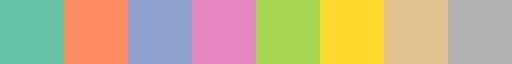

In [2]:
import matplotlib.cm as cm
set2_colors = cm.get_cmap('Set2')
set2_colors

## EV emission factors

In [9]:
EV_EFs = pd.read_csv("data/ev/EV_EFs.csv")

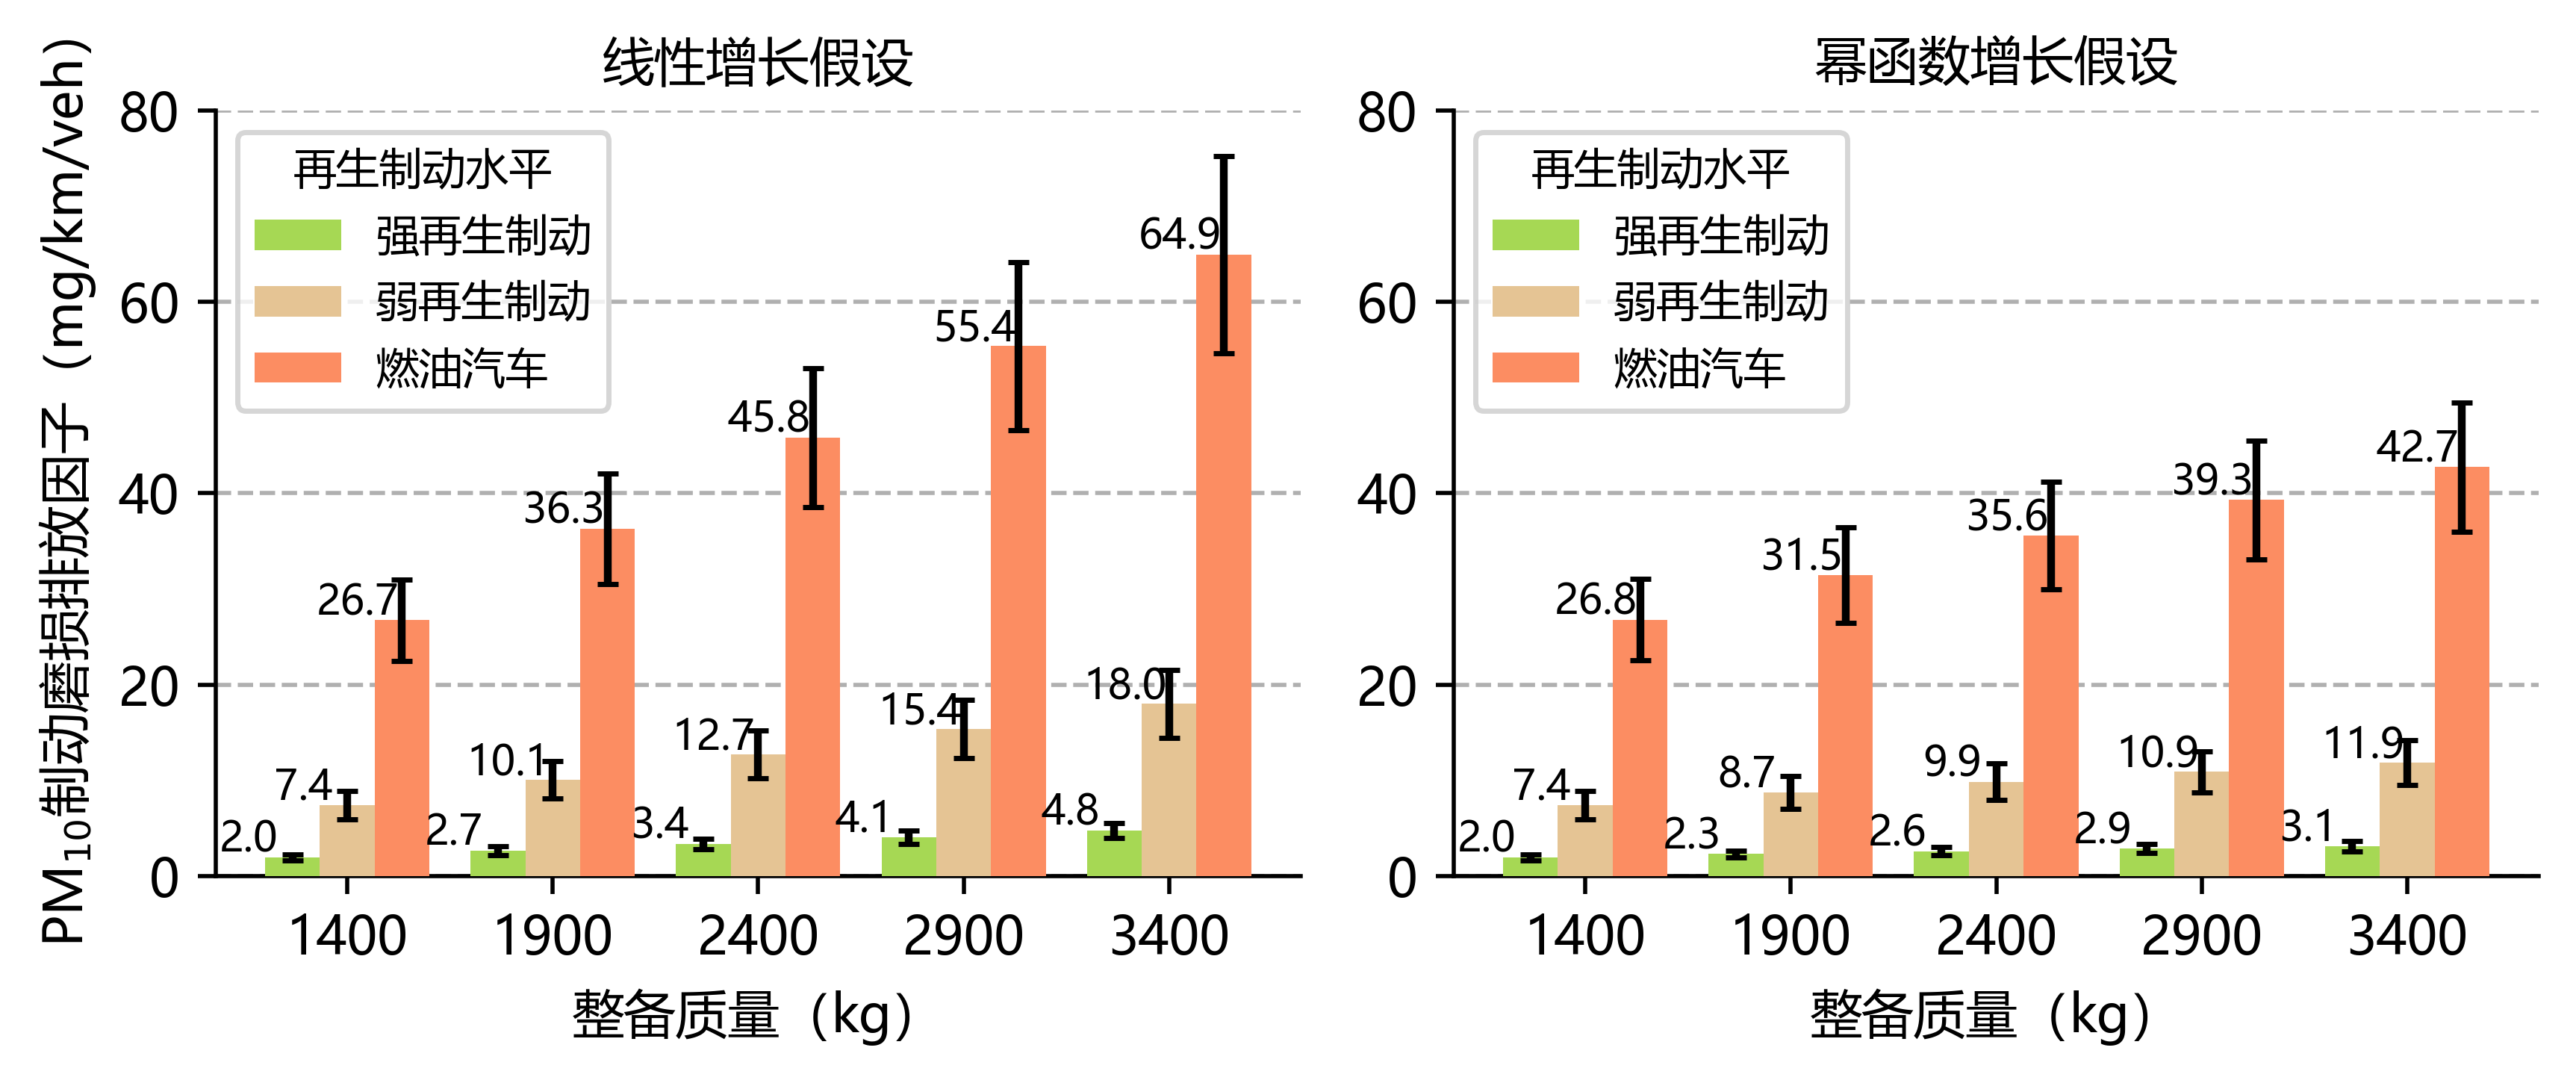

In [123]:
groups = EV_EFs.groupby('a')
fig, axes = plt.subplots(1, 2, figsize=(7,3))

reg_labels = {'zero':'燃油汽车', 'weak': '弱再生制动', 'strong': '强再生制动'}
a_labels = {1:'线性增长假设', 1.9:'幂函数增长假设'}
colors = [set2_colors(4), set2_colors(6), set2_colors(1)]


# bar plot
for i, (a_value, group) in enumerate(groups):
    pivot_EV_EFs = group.pivot(index='weight', columns='reg', values='EF')
    std_EV_EFs = group.pivot(index='weight', columns='reg', values='std')

    ax = axes[i]
    num_weights = len(pivot_EV_EFs.index)
    num_regs = len(pivot_EV_EFs.columns)
    bar_width = 0.8 / num_regs
    index = np.arange(num_weights)

    for j, reg in enumerate(pivot_EV_EFs.columns):
        bars = ax.bar(index + j * bar_width, pivot_EV_EFs[reg], bar_width, color=colors[j],
                      yerr=std_EV_EFs[reg], label=reg_labels[reg], capsize=2, zorder=10)
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}', zorder=20,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(-8.5,-1), fontsize=8, 
                        textcoords="offset points",
                        ha='center', va='bottom')

    ax.set_xlabel('整备质量（kg）')
    ax.set_ylim(0,80)
    ax.set_title(a_labels[a_value], fontsize=10)
    ax.set_xticks(index + bar_width * (num_regs - 1) / 2)
    ax.set_xticklabels(pivot_EV_EFs.index)
    ax.legend(loc=2, title='再生制动水平', title_fontsize='small', fontsize='small')
    ax.grid(axis='y', linestyle="--", zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_ylabel('PM$_{10}$制动磨损排放因子（mg/km/veh）')

plt.tight_layout()
plt.show()

## EFs yearly trend

In [7]:
EFs_year_trend = pd.read_csv("data/ev/EFs_year_trend.csv")

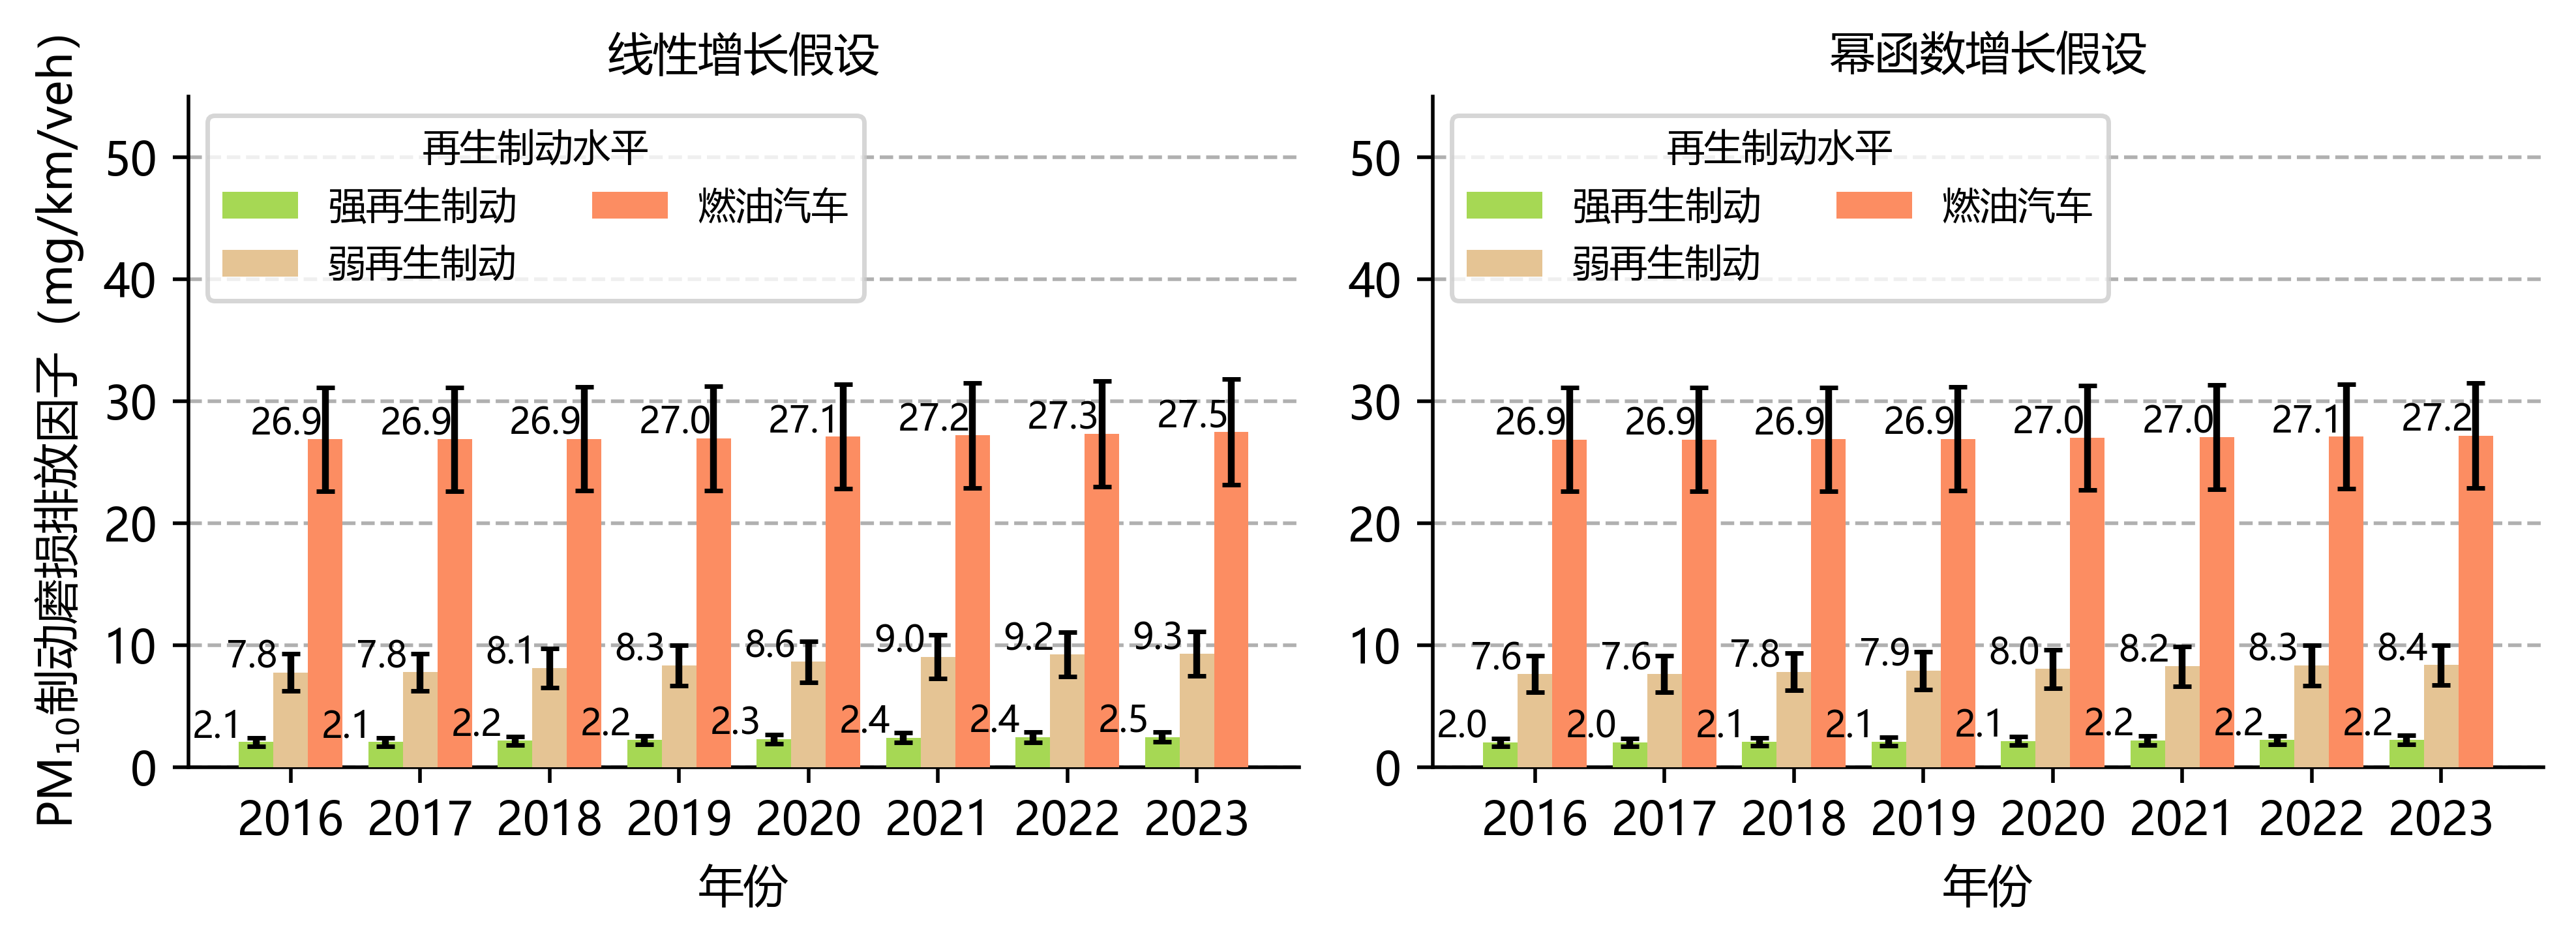

In [11]:
groups = EFs_year_trend.groupby('a')
fig, axes = plt.subplots(1, 2, figsize=(8,3))

reg_labels = {'zero':'燃油汽车', 'weak': '弱再生制动', 'strong': '强再生制动'}
a_labels = {1:'线性增长假设', 1.9:'幂函数增长假设'}
colors = [set2_colors(4), set2_colors(6), set2_colors(1)]


# bar plot
for i, (a_value, group) in enumerate(groups):
    pivot_EV_EFs = group.pivot(index='year', columns='reg', values='EF')
    std_EV_EFs = group.pivot(index='year', columns='reg', values='std')

    ax = axes[i]
    num_weights = len(pivot_EV_EFs.index)
    num_regs = len(pivot_EV_EFs.columns)
    bar_width = 0.8 / num_regs
    index = np.arange(num_weights)

    for j, reg in enumerate(pivot_EV_EFs.columns):
        bars = ax.bar(index + j * bar_width, pivot_EV_EFs[reg], bar_width, color=colors[j],
                      yerr=std_EV_EFs[reg], label=reg_labels[reg], capsize=2, zorder=10)
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}', zorder=20,
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(-8.5,-1), fontsize=8, 
                        textcoords="offset points",
                        ha='center', va='bottom')

    ax.set_xlabel('年份')
    ax.set_ylim(0,55)
    ax.set_title(a_labels[a_value], fontsize=10)
    ax.set_xticks(index + bar_width * (num_regs - 1) / 2)
    ax.set_xticklabels(pivot_EV_EFs.index)
    ax.legend(loc=2, title='再生制动水平', title_fontsize='small', ncols=2, fontsize='small')
    ax.grid(axis='y', linestyle="--", zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_ylabel('PM$_{10}$制动磨损排放因子（mg/km/veh）')

plt.tight_layout()
plt.show()

## EV penetration

In [12]:
penetration = pd.read_excel("data/ev/penetration.xlsx")

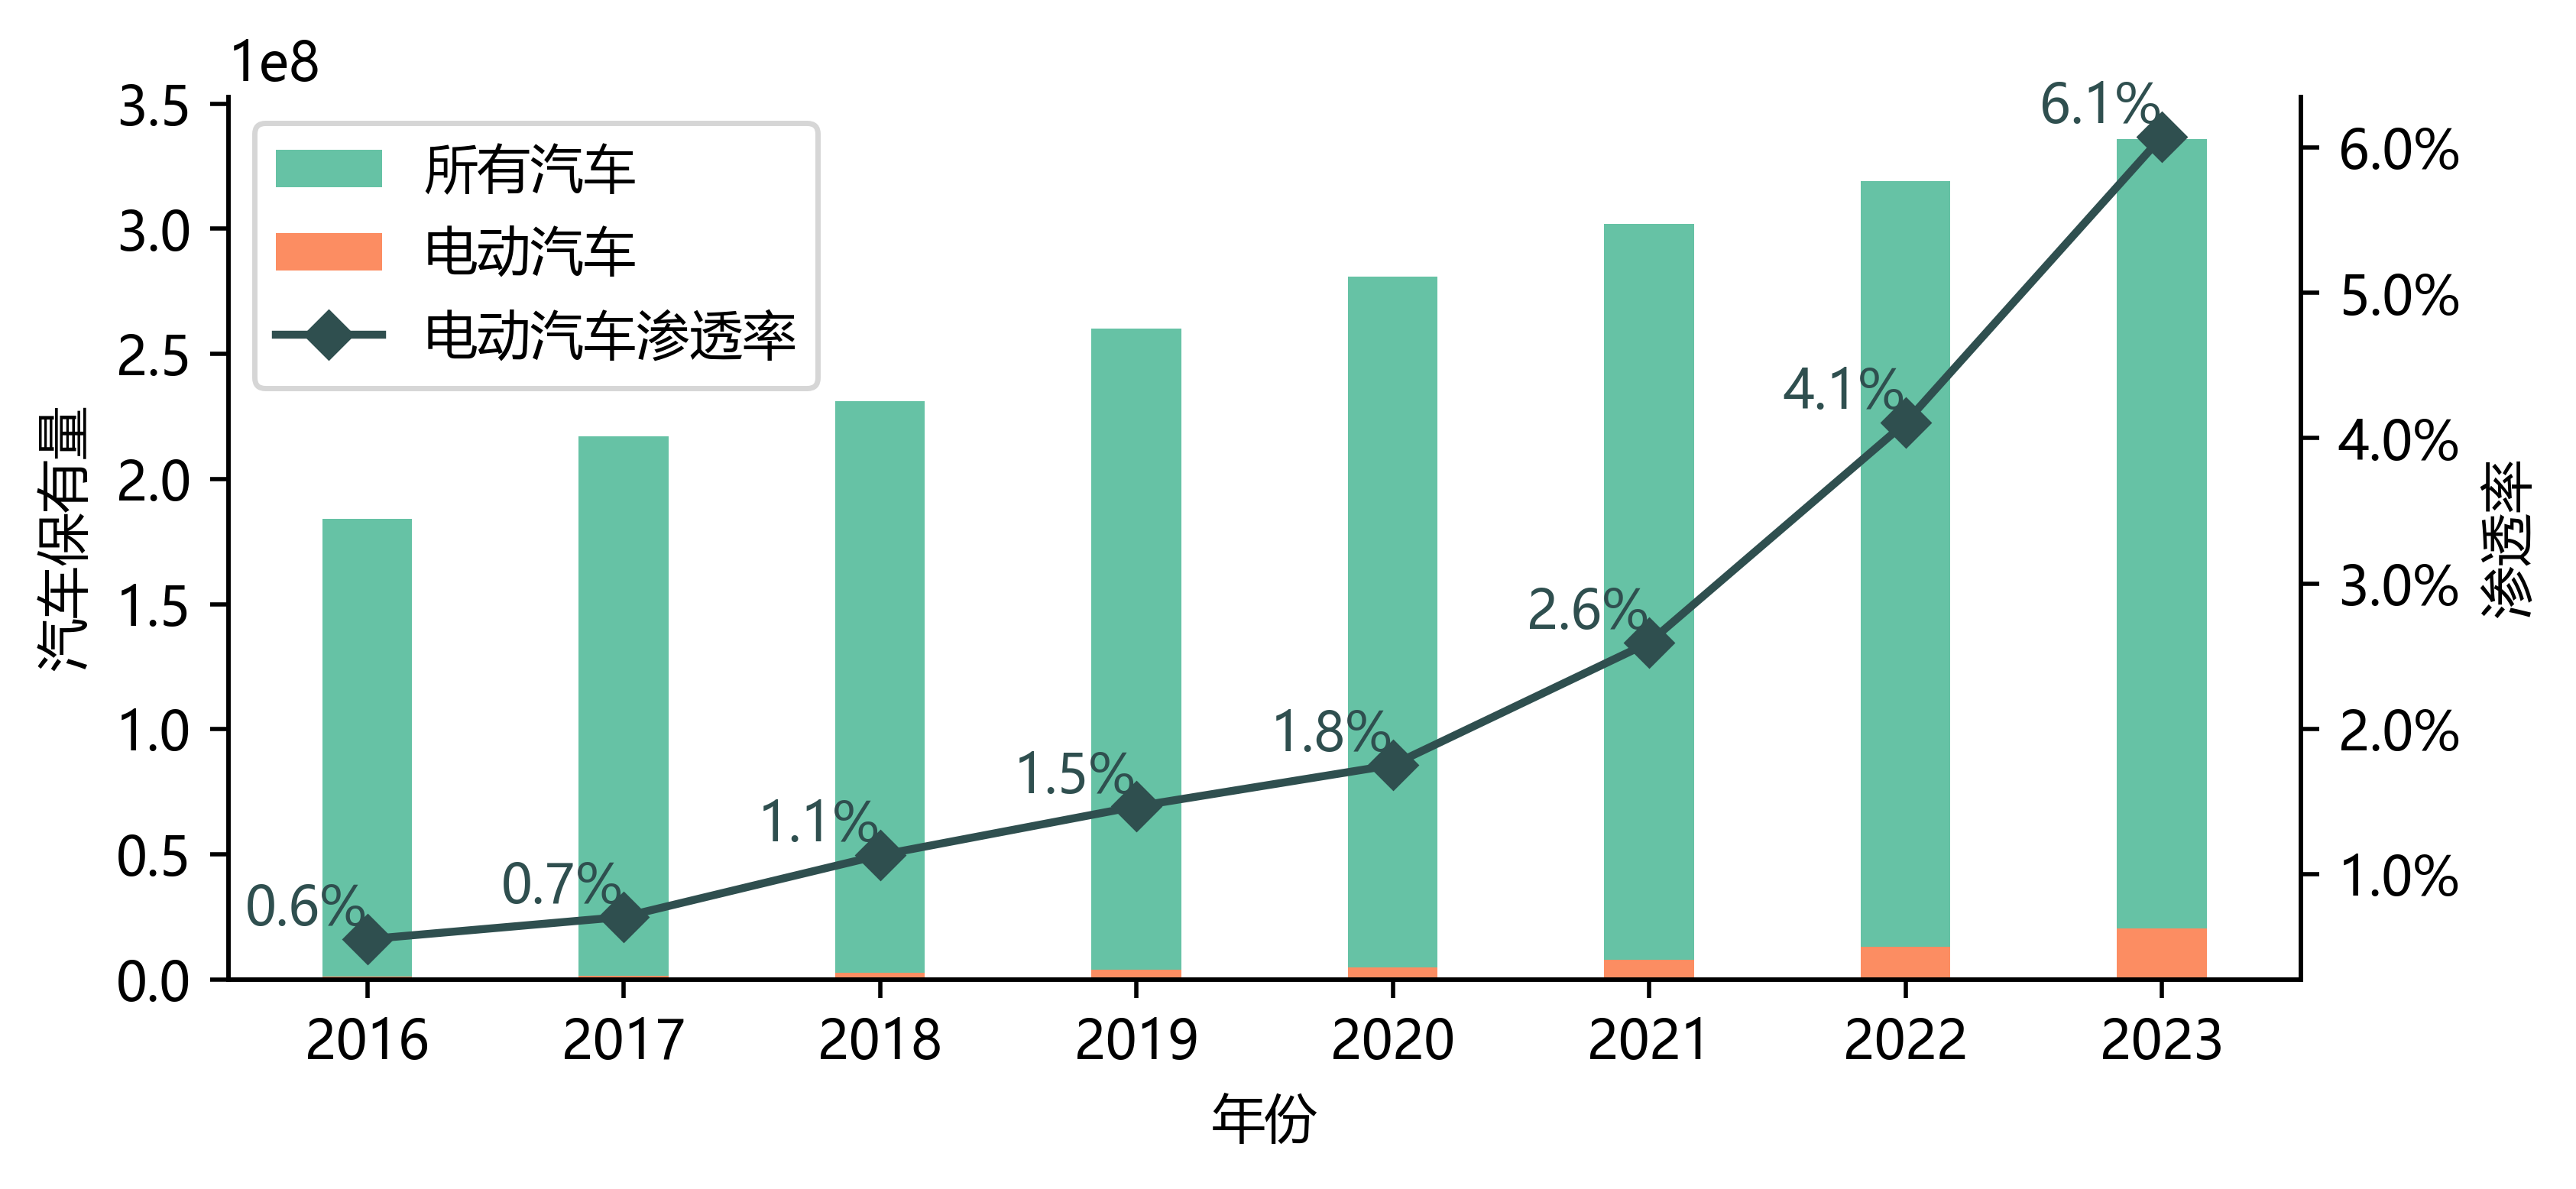

In [13]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(7,3))
ax2 = ax1.twinx()

x = np.arange(len(penetration['year']))
width = 0.35
color1 = set2_colors(0)
color2 = set2_colors(1)
ax1.bar(x, penetration['population'], width, label='所有汽车', color=color1)
ax1.bar(x, penetration['ev population'], width, label='电动汽车', color=color2)
ax1.set_xticks(x, penetration['year'])
ax1.set_xlabel('年份')
ax1.set_ylabel('汽车保有量')

line, = ax2.plot(x, penetration['penetration'], 'D-', color='darkslategrey', label='电动汽车渗透率')
ax2.set_ylabel('渗透率')
for i, v in enumerate(penetration['penetration']):
    ax2.text(i, v, f'{v * 100:.1f}%', color='darkslategrey', ha='right', va='bottom')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

## EFs trends considering penetration

In [14]:
avg_EFs_year_trend = pd.read_csv('data/ev/avg_EFs_year_trend.csv')

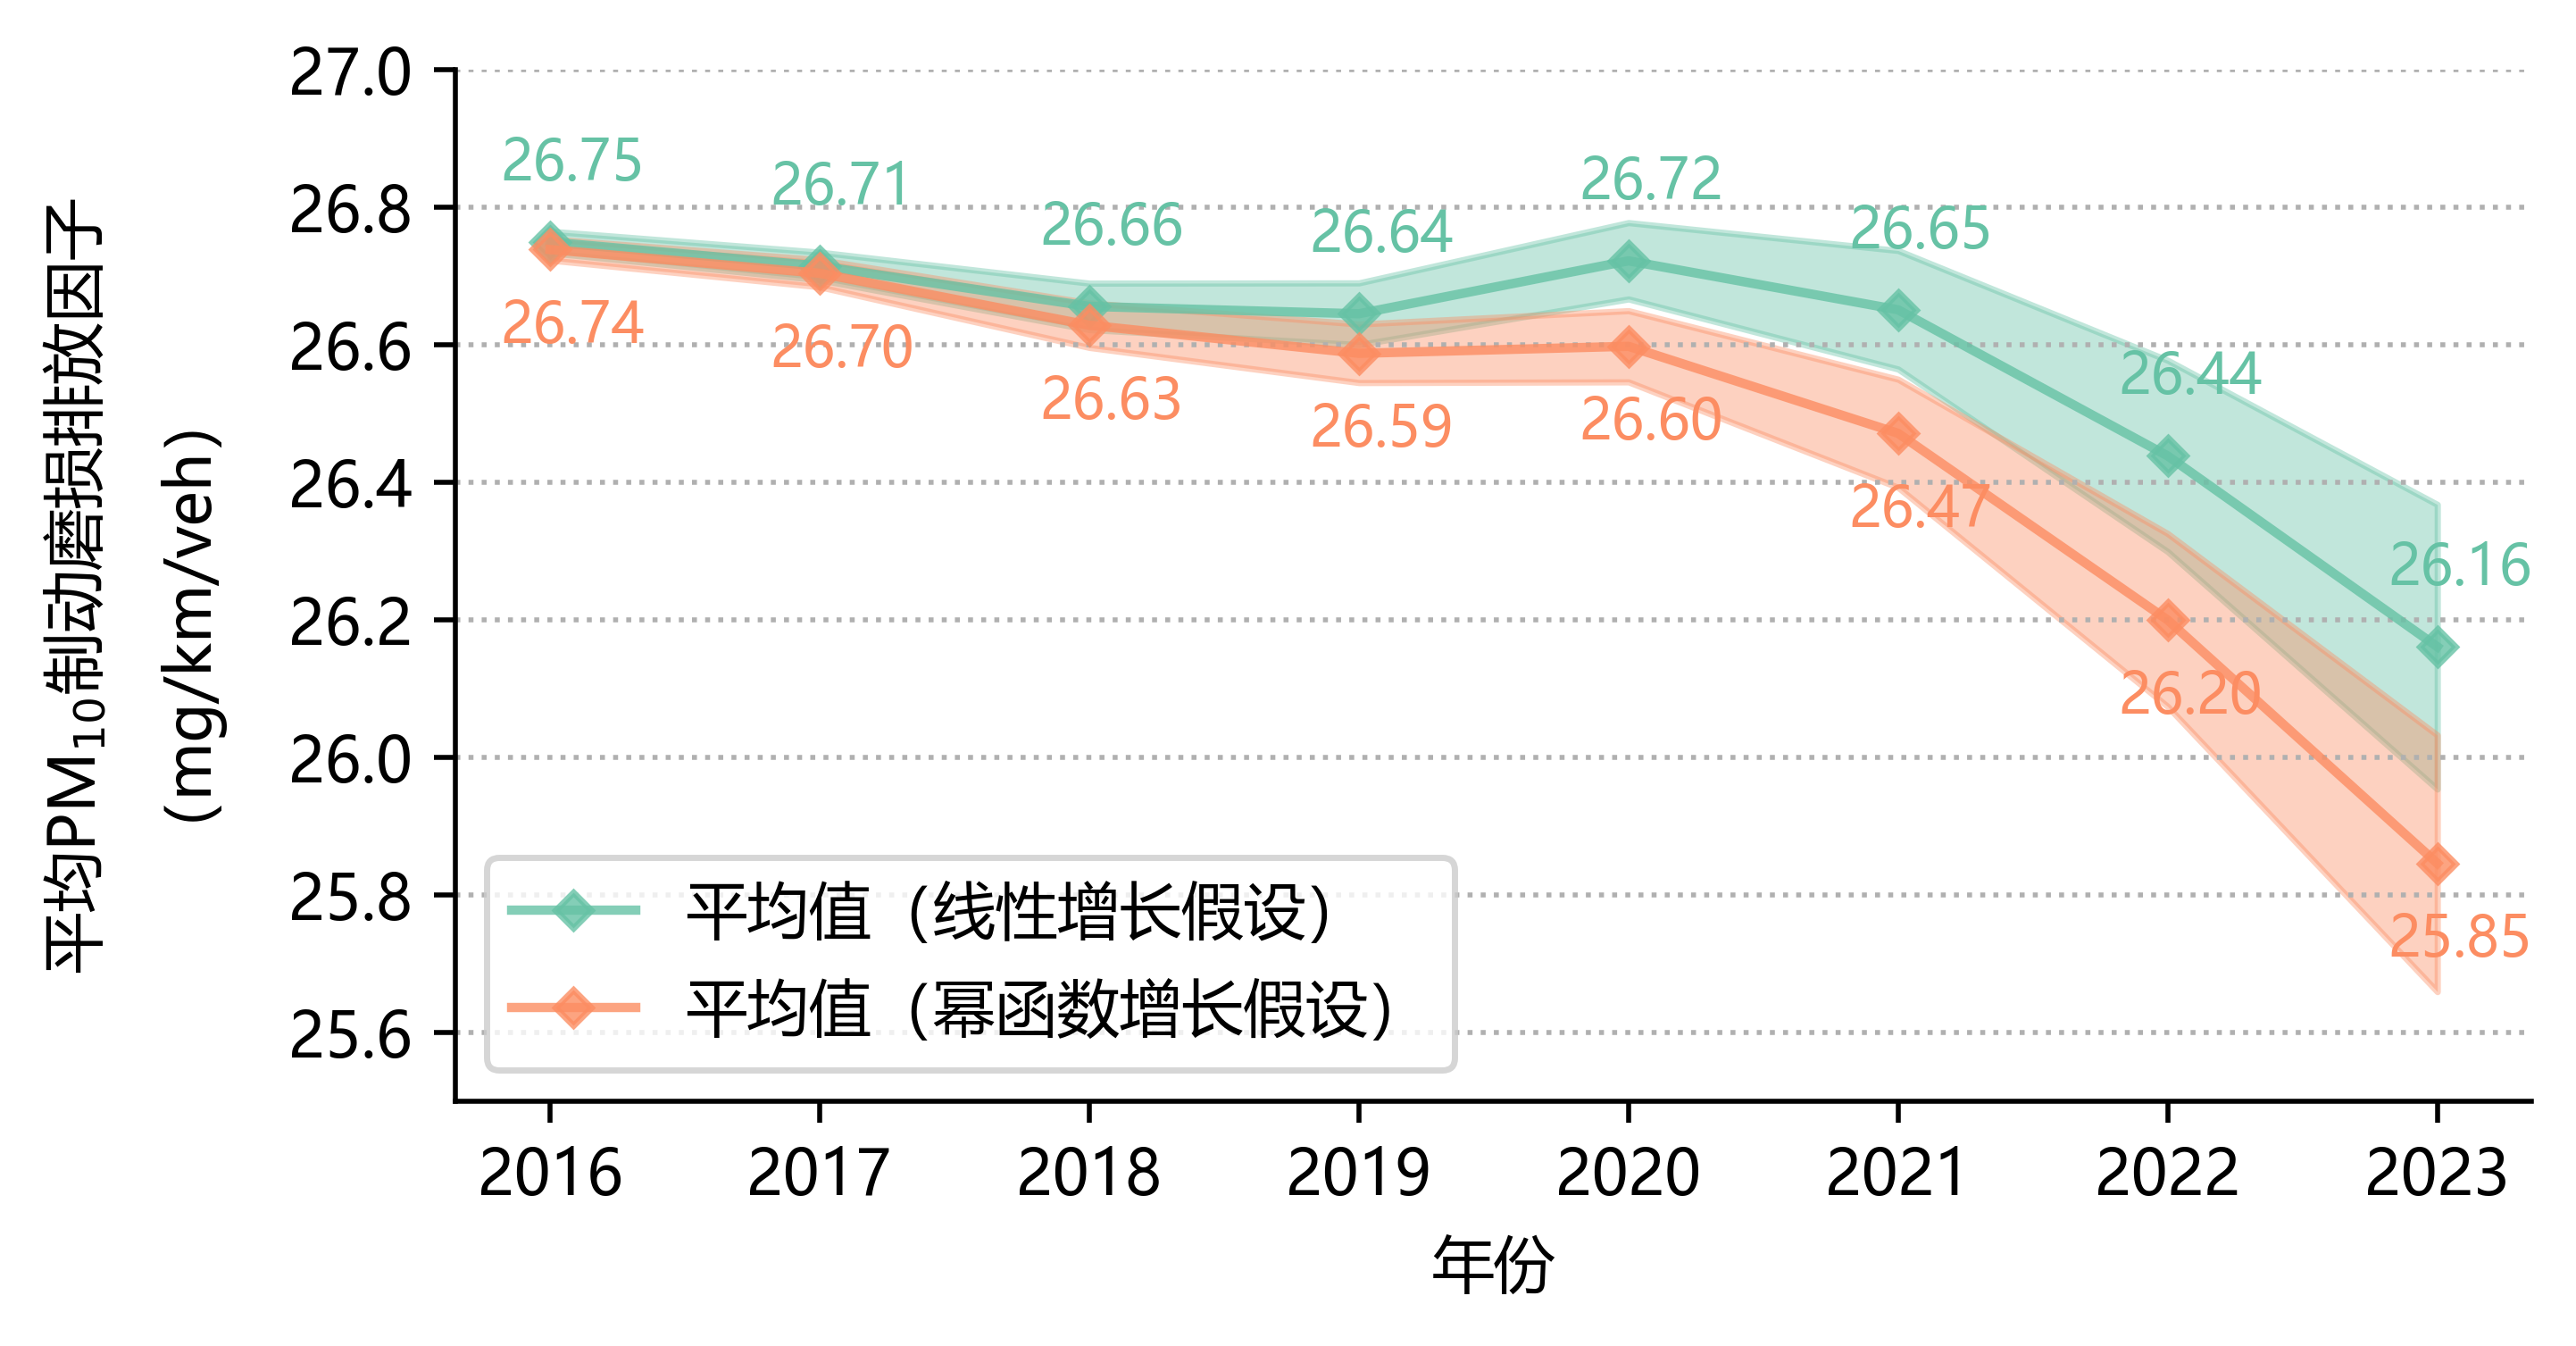

In [17]:
color_map = {1: set2_colors(0), 1.9: set2_colors(1)}
plt.figure(figsize=(6,3))

for a_value, group in avg_EFs_year_trend.groupby('a'):
    color = color_map[a_value]
    years = group['year']
    weak_ef = group['weak EF']
    strong_ef = group['strong EF']
    weak_std = group['weak std']
    strong_std = group['strong std']

    # fill between weak and strong
    plt.fill_between(years, weak_ef, strong_ef, color=color, alpha=0.4)

    # mean value plot
    mean_ef = (weak_ef + strong_ef) / 2
    line = plt.plot(years, mean_ef, 'D-', markersize=4, color=color, alpha=0.8,  label='平均值（%s增长假设）' % ('线性' if a_value==1 else '幂函数'))

    # annotation
    xytext = (-8,10) if a_value == 1 else (-8,-15)
    for x, y in zip(years, mean_ef):
        plt.annotate(f'{y:.2f}', 
                     xy=(x, y), 
                     xytext=xytext, 
                     textcoords='offset points', 
                     fontsize=9, 
                     color=color)

plt.ylim(25.5,27.)
plt.xlabel('年份')
plt.ylabel('平均PM$_{10}$制动磨损排放因子\n（mg/km/veh）\n')
plt.legend(loc=3, fontsize=10)
plt.grid(linestyle=':', axis='y')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### penetration sensitivity

In [18]:
EFs_year_pen_sensitivity = pd.read_csv("data/ev/EFs_year_pen_sensitivity.csv")
penetration = pd.read_excel("data/ev/penetration.xlsx")

In [19]:
EFs_year_pen_sensitivity

,year,pen,EF_linear,EF_exp
0,2016.0,0.00,26.869916,26.859457
1,2016.0,0.01,26.650249,26.638969
2,2016.0,0.02,26.430581,26.418481
3,2016.0,0.03,26.210913,26.197994
4,2016.0,0.04,25.991245,25.977506
...,...,...,...,...
395,2023.0,0.45,17.747583,17.324270
396,2023.0,0.46,17.531458,17.105361
397,2023.0,0.47,17.315333,16.886452
398,2023.0,0.48,17.099208,16.667543


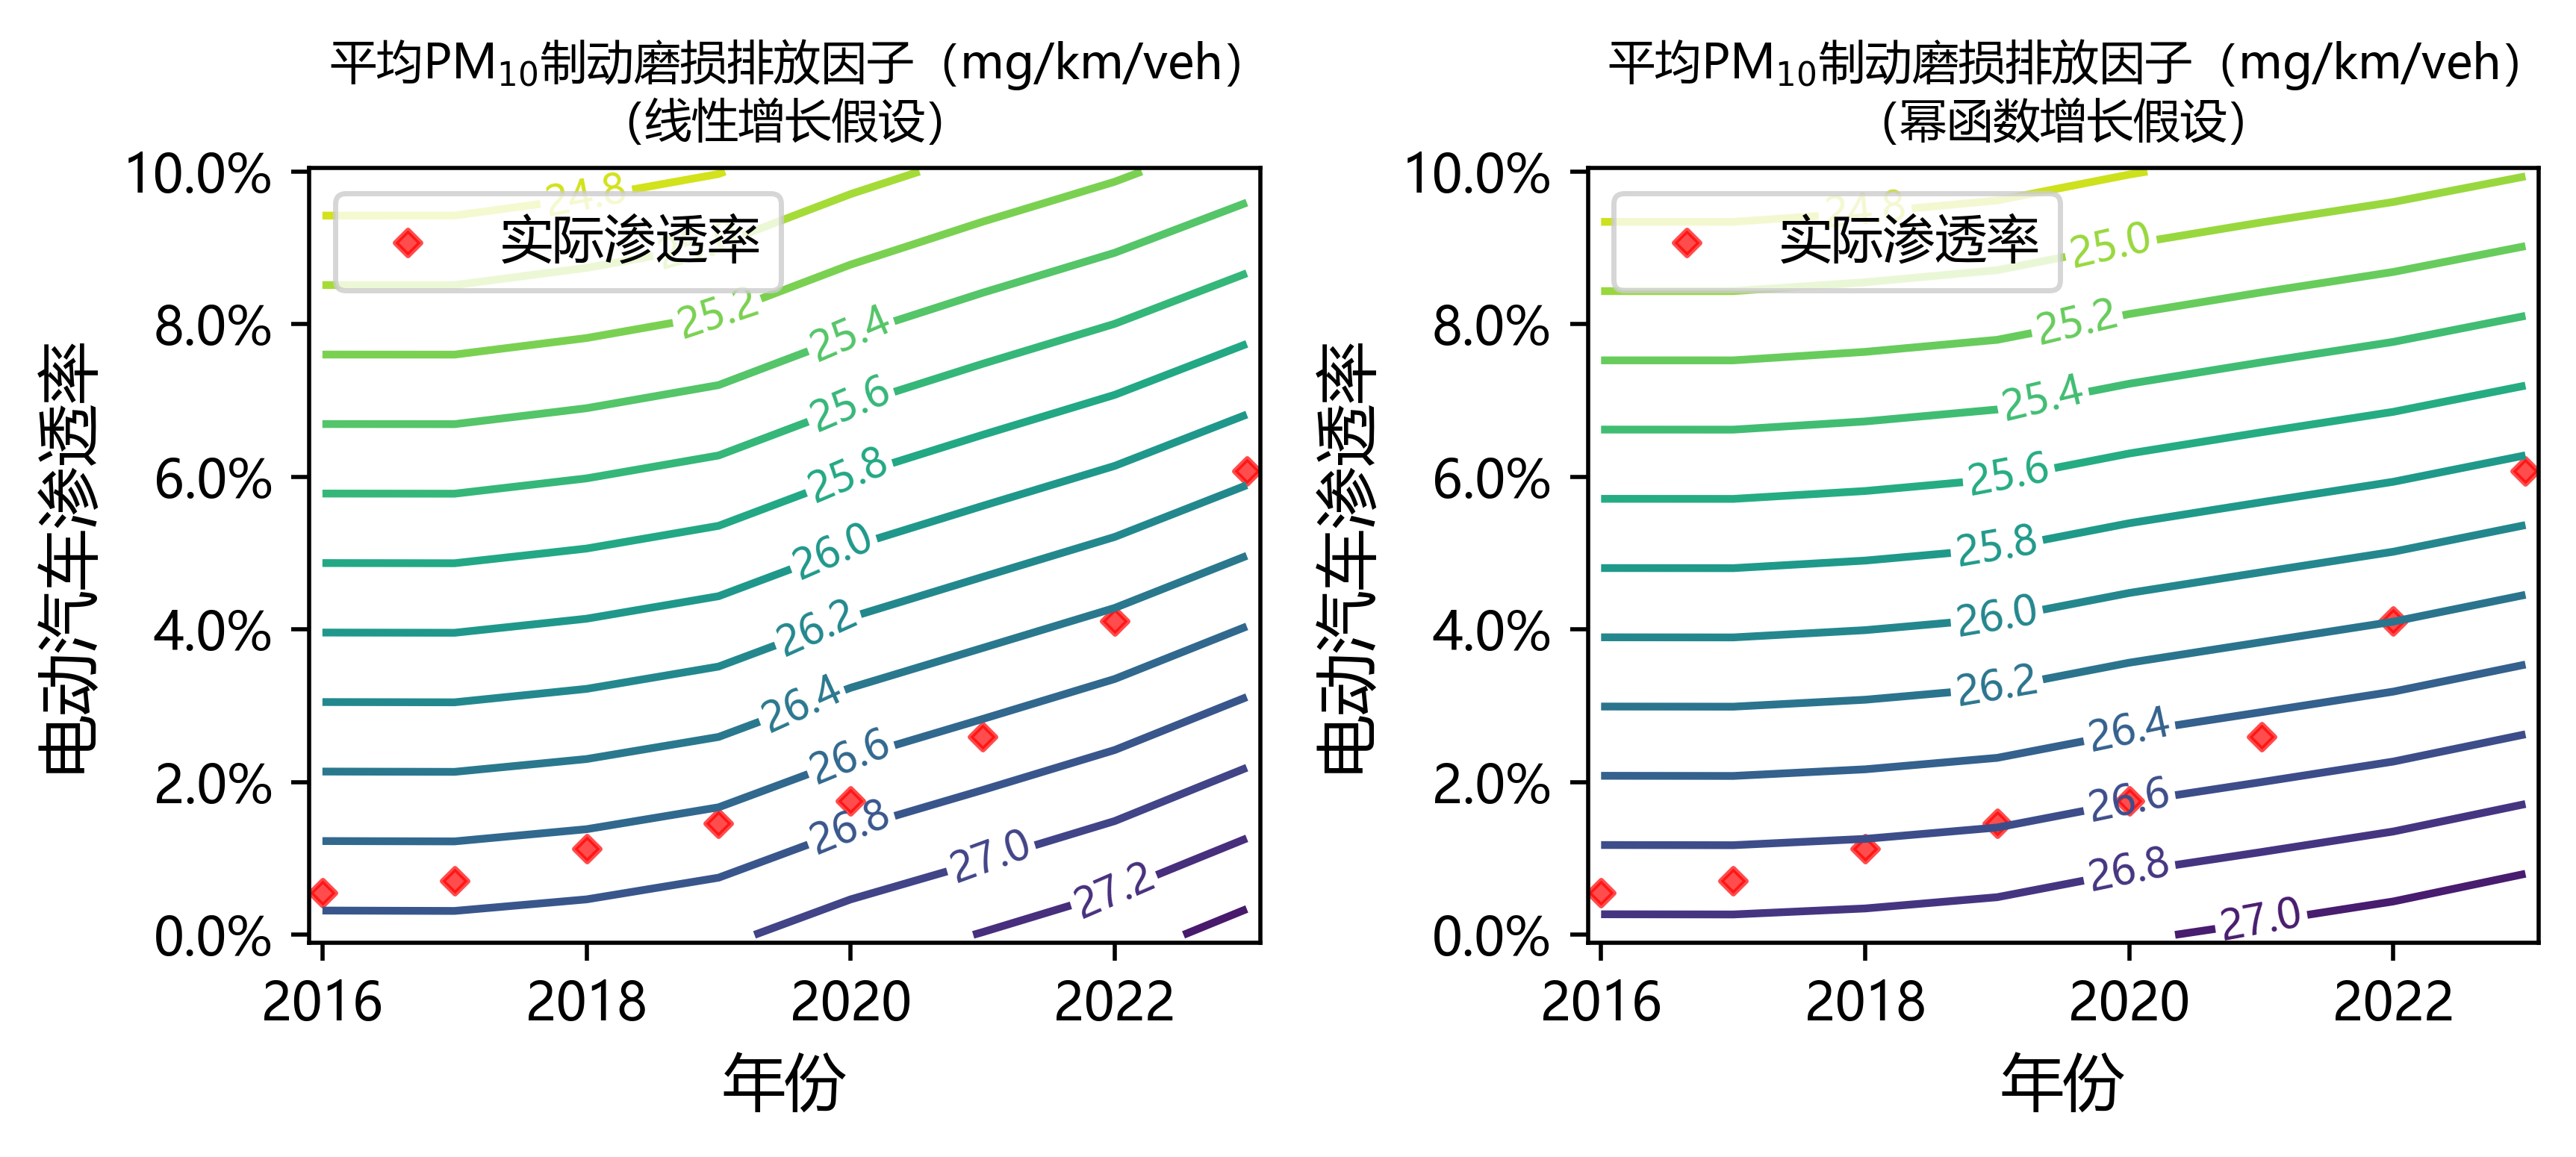

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

pivot_linear = EFs_year_pen_sensitivity[EFs_year_pen_sensitivity['pen'] <= 0.1].pivot(index='pen', columns='year', values='EF_linear')
pivot_exp = EFs_year_pen_sensitivity[EFs_year_pen_sensitivity['pen'] <= 0.1].pivot(index='pen', columns='year', values='EF_exp')

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(7,3.2))

# 绘制 EF 热力图，翻转 y 轴并反转颜色映射，设置注释格式，旋转 y 轴标签
X_linear, Y_linear = np.meshgrid(pivot_linear.columns, pivot_linear.index)
contour_linear = axes[0].contour(X_linear, Y_linear, pivot_linear.values, cmap='viridis_r', levels=15)
axes[0].set_title('平均PM$_{10}$制动磨损排放因子（mg/km/veh）\n（线性增长假设）', fontsize=9)
axes[0].set_xlabel('年份', fontsize=12)
axes[0].set_ylabel('电动汽车渗透率', fontsize=12)
axes[0].set_yticks(np.arange(0., 0.11, 0.02), ["%.1f%%" % pen for pen in np.arange(0., 0.11, 0.02)*100], rotation=0)
axes[0].set_xlim(2015.9, 2023.1)
axes[0].set_ylim(-0.001, 0.1005)
axes[0].clabel(contour_linear, inline=True, fontsize=8)

# 绘制 EF_exp 热力图，翻转 y 轴并反转颜色映射，设置注释格式，旋转 y 轴标签
X_exp, Y_exp = np.meshgrid(pivot_exp.columns, pivot_exp.index)
contour_exp = axes[1].contour(X_exp, Y_exp, pivot_exp.values, cmap='viridis_r', levels=15)
axes[1].set_title('平均PM$_{10}$制动磨损排放因子（mg/km/veh）\n（幂函数增长假设）', fontsize=9)
axes[1].set_xlabel('年份', fontsize=12)
axes[1].set_ylabel('电动汽车渗透率', fontsize=12)
axes[1].set_yticks(np.arange(0., 0.11, 0.02), ["%.1f%%" % pen for pen in np.arange(0., 0.11, 0.02)*100], rotation=0)
axes[1].set_xlim(2015.9, 2023.1)
axes[1].set_ylim(-0.001, 0.1005)
axes[1].clabel(contour_exp, inline=True, fontsize=8)

# real penetration
year = penetration['year']
pen_val = penetration['penetration']
# lower_bound_index = np.searchsorted(pen_values, pen_val, side='left') - 1
# lower_bound_index = max(0, lower_bound_index)
for ax in axes:
    ax.scatter(year, pen_val, marker='D', color='r', alpha=0.7, s=12, label='实际渗透率')
    ax.legend(loc=2)

# 显示图形
plt.tight_layout()
plt.show()